## Decision Tree Classifier
# A Decision Tree is a supervised learning algorithm used for both classification and regression tasks.
# It learns rules from the data by splitting features based on questions like:

“Is Fare > 30?”
“Is Age < 12?”
“Is Sex = female?”

In [1]:
# ===============================
# DECISION TREE CLASSIFIER - TITANIC SURVIVAL
# ===============================
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#scikit - Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report


In [2]:
## Load the cleaned dataset
train_clean = pd.read_csv("train_cleaned.csv")
test_clean = pd.read_csv("test_cleaned.csv")

X = train_clean.drop("Survived", axis=1)
y = train_clean["Survived"]


# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Why I used Validation set?
I split my dataset into training and validation sets (80:20 ratio) to evaluate model performance on unseen data.  
The validation set helps detect overfitting, tune hyperparameters, and estimate how well the model will generalize to new data.  
Without a validation set, I might get artificially high accuracy that doesn’t reflect real-world performance.

## Train a Basic Decision Tree Model

In [3]:
# Create Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

#Fit Model
tree_model.fit(X_train,y_train)

#Make predictions
y_pred = tree_model.predict(X_val)

#Evaluate
acc = accuracy_score(y_val,y_pred)
print("Decison Tree Accuracy:",acc)

Decison Tree Accuracy: 0.8156424581005587


## Plots

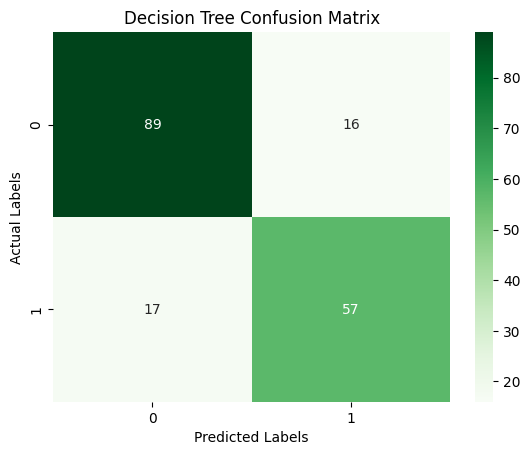

In [4]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


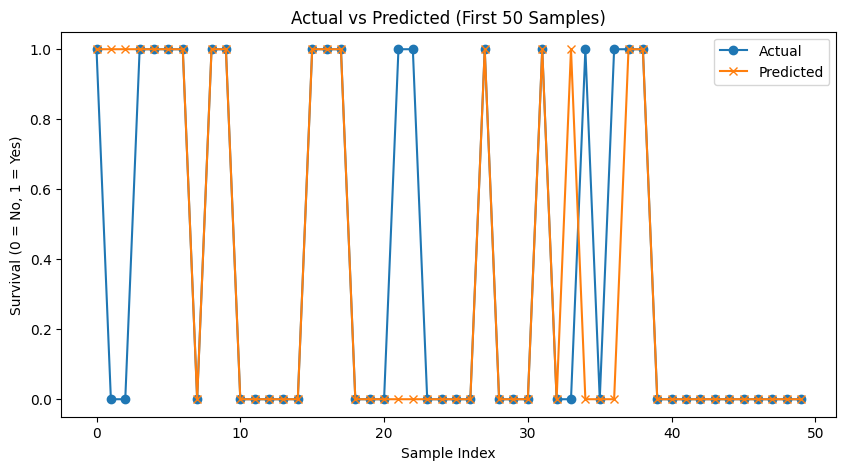

In [5]:
import matplotlib.pyplot as plt

# Plot first 50 samples for clarity
plt.figure(figsize=(10,5))
plt.plot(y_val.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title("Actual vs Predicted (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Survival (0 = No, 1 = Yes)")
plt.legend()
plt.show()


In [6]:
# ✅ Save the trained model
pickle.dump(tree_model, open('titanic_model.pkl', 'wb'))

## Decision Tree Optimization Concepts

## Max Depth

Meaning: The maximum number of levels in your tree.

Why it matters:

A deeper tree → fits training data very well but may overfit.

A shallow tree → may underfit, missing patterns.

# Tuning:
Try multiple values using GridSearchCV or RandomizedSearchCV to find the sweet spot.

## Min Samples Split

Meaning: Minimum number of samples required to split a node.

Why it matters:

Low value → more splits → overfitting.

High value → fewer splits → underfitting.

## Min Samples Leaf

Meaning: Minimum number of samples required to be at a leaf node (final node).

Why it matters:
Prevents the model from creating leaves with very few samples → helps generalization.

## Criterion (Impurity Measure)

Meaning: Metric to measure how good a split is.

Options:

gini (default) → Gini Impurity

entropy → Information Gain

When to use:

Use entropy when you want more explainability (information gain concept).

Use gini when you want speed and comparable accuracy.